N_min    =  1
N_max    =  106
N_mode   =  7
N_median =  9.205110096747337
N_mean   =  11.0916935
Chance of Yahtzee in 1 =  0.07738 %
Chance of Yahtzee in 3 =  4.59201 %


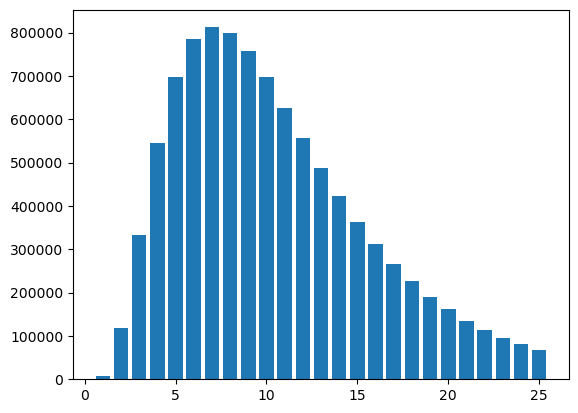

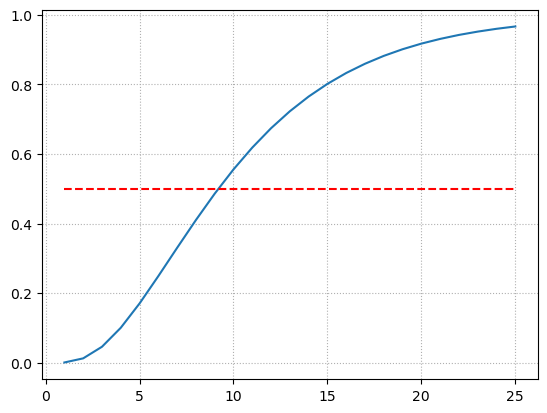

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed, randint

dice  = 5           # 5 dice
sides = 6           # 6-sided dice
games = 10_000_000  # how many Yahtzees
tries = 200         # max number of tries to get Yahtzee

cast = np.zeros(sides + 1, dtype=np.uint32)
hist = np.zeros(tries + 1, dtype=np.uint32)
seed()

for _ in range(games):
    rolls = 0
    best = 0
    count = 0
    while count < dice and rolls < tries:
        cast[1:best] = 0
        cast[best + 1:] = 0
        for _ in range(count, dice):
            cast[randint(1, sides)] += 1
        best = np.argmax(cast)
        count = cast[best]
        rolls += 1
    if count == dice:
        hist[rolls] += 1

nz = np.nonzero(hist)
nmin = np.min(nz)
nmax = np.max(nz)
nshow = 26  # arbitrary smaller index for plot with more detail
mean = np.sum(np.arange(hist.size, dtype=np.uint32) * hist) / games
cumul = np.cumsum(hist, dtype=np.uint32) / games
i = cumul[cumul < 0.5].size - 1
median = i + (0.5 - cumul[i]) / (cumul[i + 1] - cumul[i])

print("N_min    = ", nmin)
print("N_max    = ", nmax)
print("N_mode   = ", np.argmax(hist))
print("N_median = ", median)
print("N_mean   = ", mean)
print("Chance of Yahtzee in 1 = ", cumul[1] * 100, "%")
print("Chance of Yahtzee in 3 = ", cumul[3] * 100, "%")

plt.bar(range(nmin, nshow), hist[nmin:nshow])
plt.show()

plt.plot(range(nmin, nshow), cumul[nmin:nshow])
plt.grid(linestyle=":")
plt.hlines(0.5, nmin, nshow - 1, 'r', '--')
plt.show()